* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv     

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Friday-WorkingHours-Morning.pcap_ISCX.csv -----------bot인데 버리는게 좋을듯

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Monday-WorkingHours.pcap_ISCX.csv -------이건 클래스가 레이블만 있노

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv --------Infiltration 36

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Tuesday-WorkingHours.pcap_ISCX.csv

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Wednesday-workingHours.pcap_ISCX.csv


Flow Bytes/s에 1008개의 null값 존재

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from imblearn.over_sampling import RandomOverSampler
import lightgbm as lgb
import itertools
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
Dos = pd.read_csv("/content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Wednesday-workingHours.pcap_ISCX.csv")

In [ ]:
Dos[" Label"].value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name:  Label, dtype: int64

In [ ]:
Dos.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,6.916950e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,692703.000000,692703.0,692703.0,692703.0,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.0,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.0,692703.0,692703.0,692703.0,692703.0,692703.0,692703.000000,6.927030e+05,692703.000000,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,1661.546313,33.832924,551.940841,658.636320,inf,inf,2.502809e+06,6.844318e+06,2.289307e+07,2.224592e+05,2.774476e+07,5.069287e+06,9.016685e+06,2.279837e+07,1.030778e+06,1.386407e+07,2.647068e+06,3.522882e+06,9.305284e+06,9.268549e+05,0.042201,0.0,0.0,0.0,2.420580e+02,2.492460e+02,9.545305e+04,4.052544e+03,13.723771,1725.129073,278.246605,523.265612,8.876018e+05,0.097301,0.042201,0.000338,0.193693,0.418049,0.066372,0.0,0.000339,0.556957,305.664882,60.555440,551.940841,2.420580e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.556261,5.550930e+02,10.214079,1.699489e+04,5299.671256,1476.643078,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,2613.924428,64.586498,797.449564,1098.043102,NaN,NaN,5.595945e+06,1.175401e+07,3.839395e+07,3.673248e+06,4.277094e+07,1.103613e+07,1.600574e+07,3.843629e+07,8.866760e+06,3.335293e+07,9.593760e+06,1.073828e+07,2.616633e+07,8.107914e+06,0.201048,0.0,0.0,0.0,1.564277e+04,1.968957e+04,3.198607e+05,3.091927e+04,27.521716,2634.372188,369.130494,783.442461,1.748895e+06,0.296368,0.201048,0.018376,0.395192,0.493239,0.248931,0.0,0.018416,0.570734,398.045939,157.643794,797.449564,1.564277e+04,0.0,0.0,0.0,0.0,0.0,0.0,747.197814,6.163663e+03,984.204633,2.240953e+06,11869.737394,7315.272621,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,

In [ ]:
sum(Dos.isnull().sum())

1008

In [ ]:
Dos.isnull().sum()

 Destination Port                  0
 Flow Duration                     0
 Total Fwd Packets                 0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
 Fwd Packet Length Std             0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
Flow Bytes/s                    1008
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean                      0
 

In [ ]:
print(sum(Dos[Dos[" Label"] == "BENIGN"].isnull().sum()))
print(sum(Dos[Dos[" Label"] == "DoS Hulk"].isnull().sum()))
print(sum(Dos[Dos[" Label"] == "DoS GoldenEye"].isnull().sum()))
print(sum(Dos[Dos[" Label"] == "DoS slowloris"].isnull().sum()))
print(sum(Dos[Dos[" Label"] == "DoS Slowhttptest"].isnull().sum()))
print(sum(Dos[Dos[" Label"] == "Heartbleed"].isnull().sum()))

59
949
0
0
0
0


In [ ]:
Dos.dropna(inplace=True)

In [ ]:
data = {
    ' Label': [' BENIGN', ' DoS Hulk', ' BENIGN', ' DoS GoldenEye', ' DoS slowloris', ' DoS Slowhttptest', ' Heartbleed', ' BENIGN']
}
df = Dos[data]

df[' Label'] = df[' Label'].apply(lambda x: 'Dos' if x != 'BENIGN' else x)

Dos[" Label"] = df[" Label"]

<ipython-input-48-aadcfc4e63b0>:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = Dos[data]
<ipython-input-48-aadcfc4e63b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Label'] = df[' Label'].apply(lambda x: 'Dos' if x != 'BENIGN' else x)


In [ ]:
Dos.iloc[:, -1] = Dos[' Label'].astype('category').cat.codes

<ipython-input-49-0faa13b34a26>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Dos.iloc[:, -1] = Dos[' Label'].astype('category').cat.codes


In [ ]:
Dos[Dos == np.inf].count()

 Destination Port                 0
 Flow Duration                    0
 Total Fwd Packets                0
 Total Backward Packets           0
Total Length of Fwd Packets       0
 Total Length of Bwd Packets      0
 Fwd Packet Length Max            0
 Fwd Packet Length Min            0
 Fwd Packet Length Mean           0
 Fwd Packet Length Std            0
Bwd Packet Length Max             0
 Bwd Packet Length Min            0
 Bwd Packet Length Mean           0
 Bwd Packet Length Std            0
Flow Bytes/s                    289
 Flow Packets/s                 289
 Flow IAT Mean                    0
 Flow IAT Std                     0
 Flow IAT Max                     0
 Flow IAT Min                     0
Fwd IAT Total                     0
 Fwd IAT Mean                     0
 Fwd IAT Std                      0
 Fwd IAT Max                      0
 Fwd IAT Min                      0
Bwd IAT Total                     0
 Bwd IAT Mean                     0
 Bwd IAT Std                

In [ ]:
percentile_95 = np.nanpercentile(Dos[Dos != np.inf], 95)
min_value = np.nanmin(Dos[Dos != -np.inf])

Dos[Dos == np.inf] = percentile_95
Dos[Dos == -np.inf] = min_value

In [ ]:
Dos = Dos.astype(np.float32)

In [ ]:
std = StandardScaler()
std_Dos = std.fit_transform(Dos)

In [ ]:
std_Dos = pd.DataFrame(std_Dos, columns=Dos.columns)

In [ ]:
def correlation(data, label):
  data[" Label"] = label
  corr = data.corr(numeric_only=True)
  corr = corr[" Label"]
  plt.figure(figsize=(10, 15))
  sns.barplot(x=corr.sort_values(ascending=False).values, y=corr.sort_values(ascending=False).index)
  plt.title('Feature Correlation with Label')
  plt.xlabel('Correlation coefficient')
  plt.ylabel('Features')
  plt.show()
  return corr.sort_values(ascending=False)

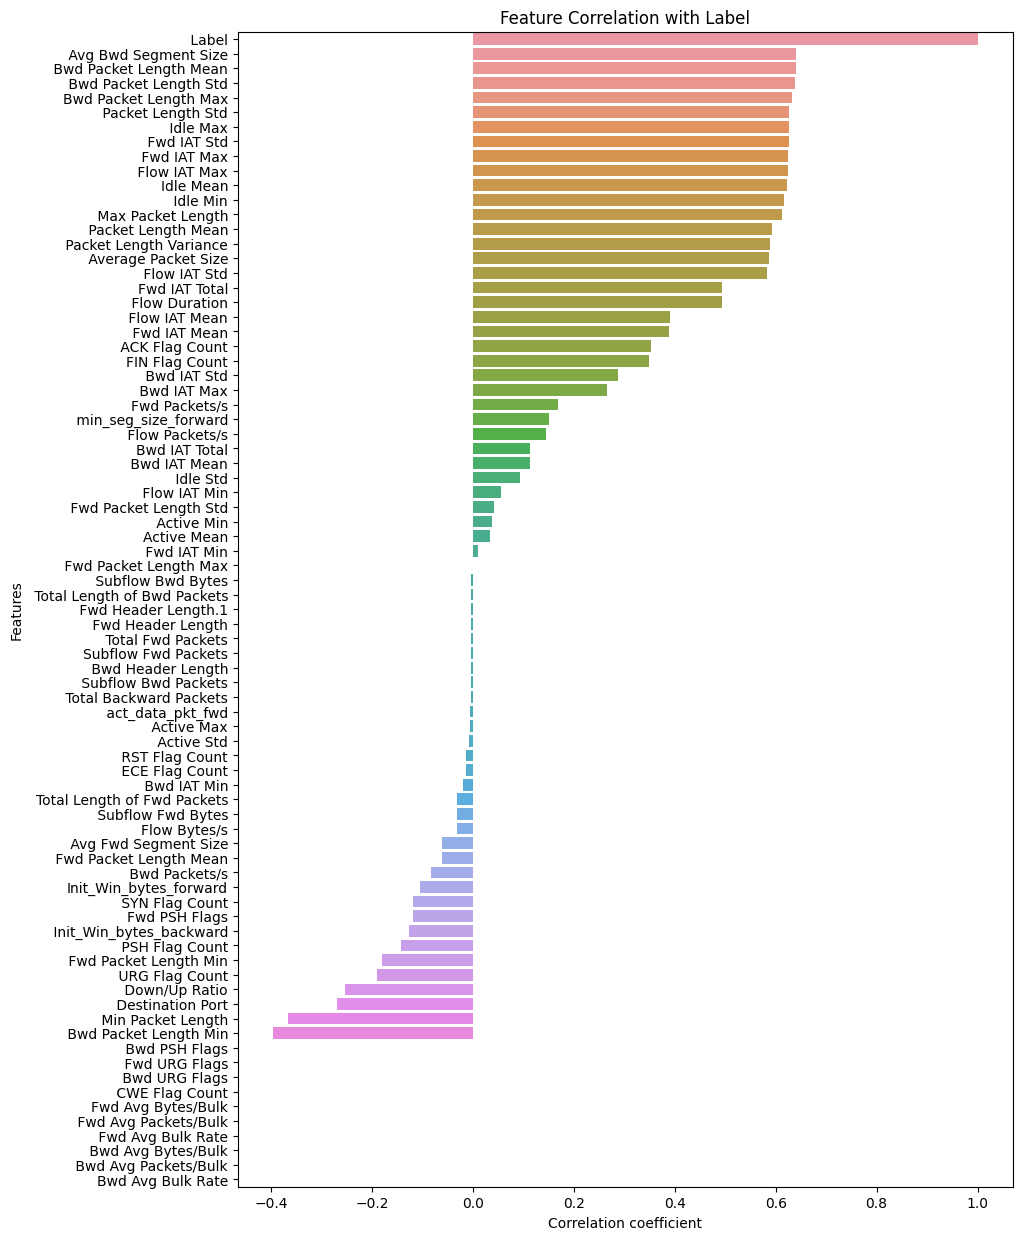

In [ ]:
corr = correlation(std_Dos.iloc[:, :-1], std_Dos.iloc[:, -1])
threshold = (corr > 0.4) | (corr < -0.3)
selected_columns = corr[threshold].index.tolist()[1:]

In [ ]:
corr

 Label                          1.000000
 Avg Bwd Segment Size           0.641215
 Bwd Packet Length Mean         0.641215
 Bwd Packet Length Std          0.637568
Bwd Packet Length Max           0.632786
 Packet Length Std              0.627047
 Idle Max                       0.626908
 Fwd IAT Std                    0.625841
 Fwd IAT Max                    0.624808
 Flow IAT Max                   0.624226
Idle Mean                       0.622640
 Idle Min                       0.615890
 Max Packet Length              0.611844
 Packet Length Mean             0.592399
 Packet Length Variance         0.589498
 Average Packet Size            0.586720
 Flow IAT Std                   0.582256
Fwd IAT Total                   0.493557
 Flow Duration                  0.492722
 Flow IAT Mean                  0.390567
 Fwd IAT Mean                   0.388854
 ACK Flag Count                 0.353225
FIN Flag Count                  0.348629
 Bwd IAT Std                    0.286778
 Bwd IAT Max    

In [ ]:
train_data = Dos[selected_columns]
label = Dos.iloc[:, -1]

In [ ]:
print(train_data.shape)
print(label.shape)

(691695, 20)
(691695,)


In [ ]:
train_data.columns

Index([' Avg Bwd Segment Size', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Bwd Packet Length Max', ' Packet Length Std',
       ' Idle Max', ' Fwd IAT Std', ' Fwd IAT Max', ' Flow IAT Max',
       'Idle Mean', ' Idle Min', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Variance', ' Average Packet Size', ' Flow IAT Std',
       'Fwd IAT Total', ' Flow Duration', ' Min Packet Length',
       ' Bwd Packet Length Min'],
      dtype='object')

In [ ]:
label.value_counts()

0.0    439972
1.0    251723
Name:  Label, dtype: int64

In [ ]:
# 그래프 맨 위가 label
# 레이블 값이 없음 레이블 값을 설정행야함
# sns.pairplot(Dos[columnss], vars=Dos[columnss].columns)

In [ ]:
# columns = Dos[columnss].columns
# num_features_to_plot = len(Dos[columnss].columns)
# features_to_plot = Dos[columnss][:num_features_to_plot]

# fig, axes = plt.subplots(num_features_to_plot, num_features_to_plot, figsize=(15, 15))

# for i, feature_i in enumerate(features_to_plot):
#     for j, feature_j in enumerate(features_to_plot):
#         ax = axes[i, j]
#         if i == j:
#             ax.hist(Dos[columnss][feature_i], bins=15, color='gray', alpha=0.7)
#             ax.set_title(feature_i)
#         else:
#             ax.scatter(Dos[columnss][feature_i], Dos[columnss][feature_j], alpha=0.5)

#         ax.set_xticks([])
#         ax.set_yticks([])

# plt.tight_layout()
# plt.show()

In [ ]:
train_data.head()

,Avg Bwd Segment Size,Bwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Max,Packet Length Std,Idle Max,Fwd IAT Std,Fwd IAT Max,Flow IAT Max,Idle Mean,Idle Min,Max Packet Length,Packet Length Mean,Packet Length Variance,Average Packet Size,Flow IAT Std,Fwd IAT Total,Flow Duration,Min Packet Length,Bwd Packet Length Min
0,6.000000,6.000000,0.000000,6.0,0.000000,0.0,0.000000,0.0,38308.0,0.0,0.0,6.0,6.000000,0.000000,9.000000,0.000000,0.0,38308.0,6.0,6.0
1,65.199997,65.199997,89.278778,163.0,56.529598,0.0,38.942837,109.0,73.0,0.0,0.0,163.0,29.294117,3195.595703,31.125000,25.510408,479.0,479.0,0.0,0.0
2,525.000000,525.000000,813.326477,1575.0,671.751526,0.0,298.746124,915.0,810.0,0.0,0.0,1575.0,370.588226,451250.125000,393.750000,204.960968,1095.0,1095.0,0.0,0.0
3,555.000000,555.000000,977.480347,3069.0,704.654053,0.0,3322.417725,13391.0,13391.0,0.0,0.0,3069.0,337.066681,496537.375000,348.689667,2519.931396,15206.0,15206.0,0.0,0.0
4,525.333313,525.333313,813.842896,1576.0,704.585083,0.0,313.850739,910.0,794.0,0.0,0.0,1576.0,393.875000,496440.125000,420.133331,207.000931,1092.0,1092.0,0.0,0.0


In [ ]:
train_data = np.array(train_data)
label = np.array(label)

In [ ]:
train_data.shape

(691695, 20)

In [ ]:
label.shape

(691695,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data, label, random_state=42, test_size=0.2, stratify=label)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_valid, label=y_valid)
ddtest = xgb.DMatrix(x_test, label=y_test)

params = {
'subsample': 1.0,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 1.0,
  'num_class': 2
}

evals_result = {}
evals_result = {}
bst = xgb.train(params, dtrain, num_boost_round=500, evals=[(dtrain, 'train'), (ddtest, 'test')], evals_result=evals_result, early_stopping_rounds=30)

[0]	train-mlogloss:0.64886	test-mlogloss:0.64884
[1]	train-mlogloss:0.60878	test-mlogloss:0.60875
[2]	train-mlogloss:0.57235	test-mlogloss:0.57230
[3]	train-mlogloss:0.53920	test-mlogloss:0.53916
[4]	train-mlogloss:0.50862	test-mlogloss:0.50855
[5]	train-mlogloss:0.48033	test-mlogloss:0.48027
[6]	train-mlogloss:0.45432	test-mlogloss:0.45422
[7]	train-mlogloss:0.43024	test-mlogloss:0.43015
[8]	train-mlogloss:0.40798	test-mlogloss:0.40787
[9]	train-mlogloss:0.38737	test-mlogloss:0.38723
[10]	train-mlogloss:0.36812	test-mlogloss:0.36799
[11]	train-mlogloss:0.35024	test-mlogloss:0.35008
[12]	train-mlogloss:0.33355	test-mlogloss:0.33338
[13]	train-mlogloss:0.31801	test-mlogloss:0.31782
[14]	train-mlogloss:0.30352	test-mlogloss:0.30330
[15]	train-mlogloss:0.28992	test-mlogloss:0.28970
[16]	train-mlogloss:0.27722	test-mlogloss:0.27698
[17]	train-mlogloss:0.26534	test-mlogloss:0.26508
[18]	train-mlogloss:0.25406	test-mlogloss:0.25379
[19]	train-mlogloss:0.24344	test-mlogloss:0.24315
[20]	train

In [ ]:
pred = bst.predict(ddtest)
print(accuracy_score(pred, y_test))
print(f1_score(pred, y_test, average='macro'))

0.9895980164667953
0.988803754347793


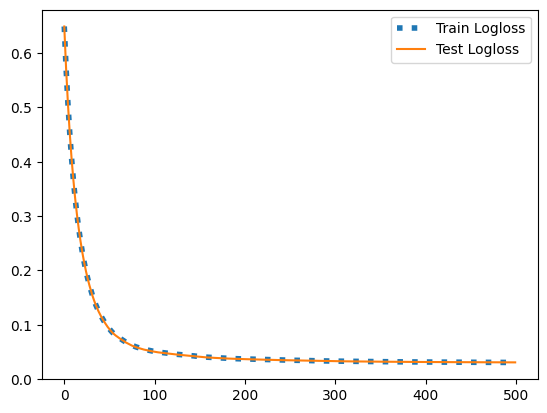

In [ ]:
plt.plot(evals_result['train']["mlogloss"], label='Train Logloss', linewidth=4, linestyle=":")
plt.plot(evals_result['test']["mlogloss"], label='Test Logloss')
plt.legend()
plt.show()

In [ ]:
bst.save_model('my_Dos_model.bst')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:38:22] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [ ]:
loaded_bst = xgb.Booster()
loaded_bst.load_model('my_Dos_model.bst')

In [ ]:
loaded_bst.predict(dtrain)

array([1., 0., 1., ..., 1., 1., 0.], dtype=float32)

0.9990078334032079


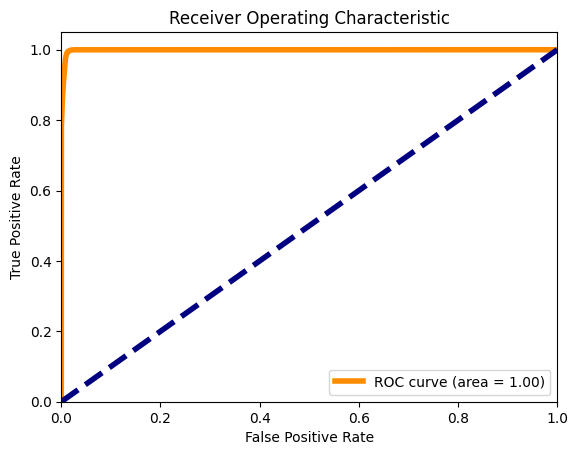

In [ ]:
y_scores = bst.predict(ddtest, output_margin=True)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
lw = 4
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
selected_columns

[' Avg Bwd Segment Size',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Packet Length Std',
 ' Idle Max',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Flow IAT Max',
 'Idle Mean',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Variance',
 ' Average Packet Size',
 ' Flow IAT Std',
 'Fwd IAT Total',
 ' Flow Duration',
 ' Min Packet Length',
 ' Bwd Packet Length Min']

In [ ]:
bst = xgb.Booster()
bst.load_model('my_Dos_model.bst')

In [1]:
# PATH = "/content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
# PortScan = pd.read_csv(PATH)

# PortScan = PortScan.dropna()
# PortScan.iloc[:, -1] = PortScan[' Label'].astype('category').cat.codes

# percentile_95 = np.nanpercentile(PortScan[PortScan != np.inf], 95)
# min_value = np.nanmin(PortScan[PortScan != -np.inf])

# PortScan[PortScan == np.inf] = percentile_95
# PortScan[PortScan == -np.inf] = min_value

# std_port_scan = std.transform(PortScan)
# std_port_scan = pd.DataFrame(std_port_scan, columns=PortScan.columns)
# PortScan = PortScan.drop(" Label", axis=1)
# train_data = std_port_scan[selected_columns]

# DDos_data = np.array(train_data)

# DDos_data = xgb.DMatrix(DDos_data)
# pred = bst.predict(DDos_data)

# unique, counts = np.unique(pred, return_counts=True)

# value_counts = dict(zip(unique, counts))
# print(value_counts)

# true_negative = value_counts[0.0]

# false_positive = value_counts[1.0]

# total_predictions = true_negative + false_positive

# accuracy = true_negative / total_predictions
# print(accuracy)